## Lession 5: Paths and centralities

We will explore paths in this lab session, as well as some centrality measures that are based on paths, in generated and real graphs.

- How to calculate path
- Shorthest paths in the network
- Network diameters
- Path based centralities 

First we need to import pandas, networkx and matplotlib.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

### Undirected, unweighted network.

In [2]:
G=nx.Graph()
nodes=['a','b','c','d','e','f','g','h','i']
for v in nodes:
    G.add_node(v)

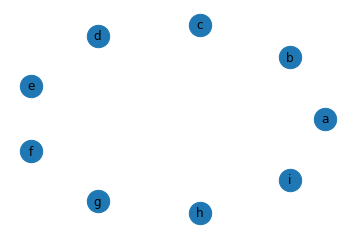

In [3]:
posG=nx.circular_layout(G)
nx.draw_networkx_nodes(G, pos=posG, node_size=500)
nx.draw_networkx_labels(G, pos=posG)
plt.box(False)
plt.show()

In [4]:
edges=[('a','e'),('e','d'),('e','f'),('d','f'),('f','h'),('f','g'),('h','i'),('h','b')]
for e in edges:
    G.add_edge(*e)

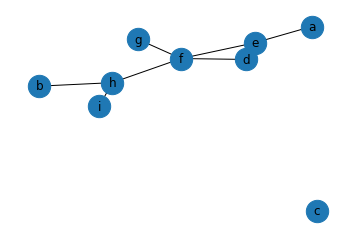

In [5]:
posG=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos=posG, node_size=500)
nx.draw_networkx_labels(G, pos=posG)
nx.draw_networkx_edges(G,pos=posG,edge_color="black", width=1)
plt.box(False)
plt.show()


We can check if there is a path from source node to node target node: <br> **nx.has_path(G, source, target)**

In [6]:
nx.has_path(G,'a','c')

False

In [7]:
nx.has_path(G,'e','f')

True

What is the shortest path from source node to target node: <br>
**nx.shortest_path(G, source, target)**

In [8]:
pth=nx.shortest_path(G, 'a','b')
pth

['a', 'e', 'f', 'h', 'b']

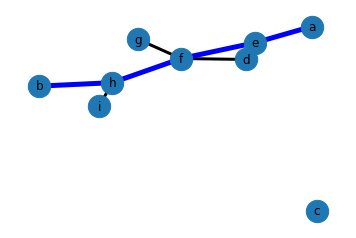

In [9]:
#S=['f','d','e']
H=G.subgraph(pth)
nx.draw_networkx_nodes(G, pos=posG, node_size=500)
nx.draw_networkx_labels(G, pos=posG)
nx.draw_networkx_edges(G,pos=posG,edge_color="black", width=3)
nx.draw_networkx_edges(H,pos=posG,edge_color="blue", width=5)
plt.box(False)
plt.show()

The path length:
**nx.shortest_path_length(G, source, target)**

In [10]:
l=nx.shortest_path_length(G, 'i','g')
l

3

We want all shortest paths that start in source node:<br>
**nx.shortest_path(G,'a')** <br>
**nx.shortest_path_length(G,'a')**<br>
The output is dictionary

In [11]:
la=nx.shortest_path(G,'a')
la

{'a': ['a'],
 'e': ['a', 'e'],
 'd': ['a', 'e', 'd'],
 'f': ['a', 'e', 'f'],
 'h': ['a', 'e', 'f', 'h'],
 'g': ['a', 'e', 'f', 'g'],
 'i': ['a', 'e', 'f', 'h', 'i'],
 'b': ['a', 'e', 'f', 'h', 'b']}

In [12]:
da=nx.shortest_path_length(G,'g')
da

{'g': 0, 'f': 1, 'e': 2, 'd': 2, 'h': 2, 'a': 3, 'i': 3, 'b': 3}

Paths between all pairs of nodes:<br>
**nx.shortest_path(G)** <br>
**nx.shortest_path_length(G)** <br>
The output is dictionary of dictionaries

In [13]:
l=nx.shortest_path(G)
l

{'a': {'a': ['a'],
  'e': ['a', 'e'],
  'd': ['a', 'e', 'd'],
  'f': ['a', 'e', 'f'],
  'h': ['a', 'e', 'f', 'h'],
  'g': ['a', 'e', 'f', 'g'],
  'i': ['a', 'e', 'f', 'h', 'i'],
  'b': ['a', 'e', 'f', 'h', 'b']},
 'b': {'b': ['b'],
  'h': ['b', 'h'],
  'f': ['b', 'h', 'f'],
  'i': ['b', 'h', 'i'],
  'e': ['b', 'h', 'f', 'e'],
  'd': ['b', 'h', 'f', 'd'],
  'g': ['b', 'h', 'f', 'g'],
  'a': ['b', 'h', 'f', 'e', 'a']},
 'c': {'c': ['c']},
 'd': {'d': ['d'],
  'e': ['d', 'e'],
  'f': ['d', 'f'],
  'a': ['d', 'e', 'a'],
  'h': ['d', 'f', 'h'],
  'g': ['d', 'f', 'g'],
  'i': ['d', 'f', 'h', 'i'],
  'b': ['d', 'f', 'h', 'b']},
 'e': {'e': ['e'],
  'a': ['e', 'a'],
  'd': ['e', 'd'],
  'f': ['e', 'f'],
  'h': ['e', 'f', 'h'],
  'g': ['e', 'f', 'g'],
  'i': ['e', 'f', 'h', 'i'],
  'b': ['e', 'f', 'h', 'b']},
 'f': {'f': ['f'],
  'e': ['f', 'e'],
  'd': ['f', 'd'],
  'h': ['f', 'h'],
  'g': ['f', 'g'],
  'a': ['f', 'e', 'a'],
  'i': ['f', 'h', 'i'],
  'b': ['f', 'h', 'b']},
 'g': {'g': ['g'],
 

In [14]:
for v in l.keys():
    for u in l[v].keys():
        print(v,u,len(l[v][u])-1)

a a 0
a e 1
a d 2
a f 2
a h 3
a g 3
a i 4
a b 4
b b 0
b h 1
b f 2
b i 2
b e 3
b d 3
b g 3
b a 4
c c 0
d d 0
d e 1
d f 1
d a 2
d h 2
d g 2
d i 3
d b 3
e e 0
e a 1
e d 1
e f 1
e h 2
e g 2
e i 3
e b 3
f f 0
f e 1
f d 1
f h 1
f g 1
f a 2
f i 2
f b 2
g g 0
g f 1
g e 2
g d 2
g h 2
g a 3
g i 3
g b 3
h h 0
h f 1
h i 1
h b 1
h e 2
h d 2
h g 2
h a 3
i i 0
i h 1
i f 2
i b 2
i e 3
i d 3
i g 3
i a 4


In [15]:
d=dict(nx.shortest_path_length(G))
d

{'a': {'a': 0, 'e': 1, 'd': 2, 'f': 2, 'h': 3, 'g': 3, 'i': 4, 'b': 4},
 'b': {'b': 0, 'h': 1, 'f': 2, 'i': 2, 'e': 3, 'd': 3, 'g': 3, 'a': 4},
 'c': {'c': 0},
 'd': {'d': 0, 'e': 1, 'f': 1, 'a': 2, 'h': 2, 'g': 2, 'i': 3, 'b': 3},
 'e': {'e': 0, 'a': 1, 'd': 1, 'f': 1, 'h': 2, 'g': 2, 'i': 3, 'b': 3},
 'f': {'f': 0, 'e': 1, 'd': 1, 'h': 1, 'g': 1, 'a': 2, 'i': 2, 'b': 2},
 'g': {'g': 0, 'f': 1, 'e': 2, 'd': 2, 'h': 2, 'a': 3, 'i': 3, 'b': 3},
 'h': {'h': 0, 'f': 1, 'i': 1, 'b': 1, 'e': 2, 'd': 2, 'g': 2, 'a': 3},
 'i': {'i': 0, 'h': 1, 'f': 2, 'b': 2, 'e': 3, 'd': 3, 'g': 3, 'a': 4}}

Average shortest path length in network G
$\langle l \rangle=\frac{1}{N(N-1)}\sum_{i,j}d_{ij}$

In [16]:
sum=0
for v in d.keys():
    for u in d[v].keys():
        sum=sum+d[v][u]
lavr=(1.0*sum)/(1.0*G.number_of_nodes()*(G.number_of_nodes()-1))
lavr

1.6666666666666667

In [17]:
lavr_nx=nx.average_shortest_path_length(G)

NetworkXError: Graph is not connected.

Make G connected by removing node 'c'

In [18]:
G.remove_node('c')

In [19]:
lavr_nx=nx.average_shortest_path_length(G)

In [20]:
print(lavr, lavr_nx)

1.6666666666666667 2.142857142857143


There is a difference. Do you know why?

In [21]:
sum=0
for v in l.keys():
    for u in l[v].keys():
        sum=sum+len(l[v][u])-1
lavr=(1.0*sum)/(1.0*G.number_of_nodes()*(G.number_of_nodes()-1))
lavr

2.142857142857143

Diameter: <br>
**nx.diameter()**

In [22]:
nx.diameter(G)

4

### Paths in directed, unweighted networks

First lets define the network.

In [23]:
DG=nx.DiGraph()
nodes=['a','b','c','d','e','f','g','h','i']
for v in nodes:
    DG.add_node(v)

In [24]:
edges=[('a','e'),('e','d'),('d','f'),('f','e'),('f','h'),('f','g'),('i','h'),('h','b')]
for e in edges:
    DG.add_edge(*e)

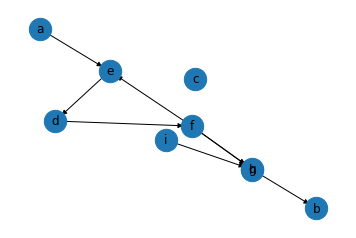

In [25]:
posDG=nx.kamada_kawai_layout(DG)
nx.draw_networkx_nodes(DG, pos=posDG, node_size=500)
nx.draw_networkx_labels(DG, pos=posDG)
nx.draw_networkx_edges(DG,pos=posDG,edge_color="black", width=1)
plt.box(False)
plt.show()

In [26]:
nx.has_path(DG,'b','a')

False

In [27]:
nx.has_path(DG,'a','b')

True

In [28]:
nx.shortest_path(DG,'a','b')

['a', 'e', 'd', 'f', 'h', 'b']

In [29]:
nx.shortest_path_length(DG,'a','b')

5

In [30]:
l=nx.shortest_path(DG)
l

{'a': {'a': ['a'],
  'e': ['a', 'e'],
  'd': ['a', 'e', 'd'],
  'f': ['a', 'e', 'd', 'f'],
  'h': ['a', 'e', 'd', 'f', 'h'],
  'g': ['a', 'e', 'd', 'f', 'g'],
  'b': ['a', 'e', 'd', 'f', 'h', 'b']},
 'b': {'b': ['b']},
 'c': {'c': ['c']},
 'd': {'d': ['d'],
  'f': ['d', 'f'],
  'e': ['d', 'f', 'e'],
  'h': ['d', 'f', 'h'],
  'g': ['d', 'f', 'g'],
  'b': ['d', 'f', 'h', 'b']},
 'e': {'e': ['e'],
  'd': ['e', 'd'],
  'f': ['e', 'd', 'f'],
  'h': ['e', 'd', 'f', 'h'],
  'g': ['e', 'd', 'f', 'g'],
  'b': ['e', 'd', 'f', 'h', 'b']},
 'f': {'f': ['f'],
  'e': ['f', 'e'],
  'h': ['f', 'h'],
  'g': ['f', 'g'],
  'd': ['f', 'e', 'd'],
  'b': ['f', 'h', 'b']},
 'g': {'g': ['g']},
 'h': {'h': ['h'], 'b': ['h', 'b']},
 'i': {'i': ['i'], 'h': ['i', 'h'], 'b': ['i', 'h', 'b']}}

In [31]:
nx.average_shortest_path_length(DG)

NetworkXError: Graph is not weakly connected.

In [32]:
DG.remove_node('c')

In [33]:
nx.average_shortest_path_length(DG)

0.9464285714285714

### Undirected, weighted networks

In [34]:
W=nx.Graph()
nodes=['a','b','c','d','e','f','g','h','i']
for v in nodes:
    W.add_node(v)

In [35]:
edges=[('a','e'),('e','d'),('d','f'),('f','e'),('f','h'),('f','g'),('i','h'),('h','b')]
w=[2,1,1,3,1,2,1,2]
elabels={}
for i in range(0,len(edges)):
    W.add_edge(*edges[i],weight=w[i])
    elabels[edges[i]]=w[i]
    

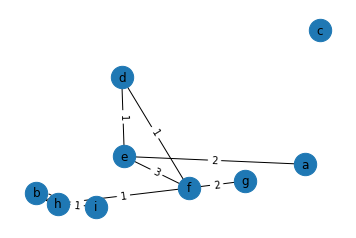

In [36]:
posW=nx.random_layout(W)

nx.draw_networkx_nodes(W, pos=posW, node_size=500)
nx.draw_networkx_labels(W, pos=posW)
nx.draw_networkx_edges(W,pos=posW,edge_color="black", width=1)
nx.draw_networkx_edge_labels(W,pos=posW,edge_labels=elabels, label_pos=0.5)
plt.box(False)
plt.show()

In [37]:
nx.shortest_path(W,'a','b')

['a', 'e', 'f', 'h', 'b']

In [38]:
nx.shortest_path_length(W,'a','b')

4

In [39]:
nx.shortest_path(W,'a','b', 'weight')

['a', 'e', 'd', 'f', 'h', 'b']

In [40]:
nx.shortest_path_length(W,'a','b','weight')

7

## Paths in real networks

Jazz collaboration network. Undirected, unweighted.

In [41]:
nodesJZ=pd.read_csv("../data/jazz_network/nodes.csv")

In [42]:
nodesJZ.head()

,# index,name,_pos
0,0,1,"array([ 5.4954927 , -7.38559978])"
1,1,8,"array([ 5.54046101, -7.1719437 ])"
2,2,24,"array([ 5.51767189, -7.34637979])"
3,3,35,"array([ 5.57162333, -7.32375881])"
4,4,42,"array([ 5.49922528, -7.43471466])"


In [43]:
nodesJZ.columns

Index(['# index', ' name', ' _pos'], dtype='object')

In [44]:
nodesJZ.columns=nodesJZ.columns.str.strip()

In [45]:
edgesJZ=pd.read_csv("../data/jazz_network/edges.csv")

In [46]:
edgesJZ.head()

,# source,target
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


In [47]:
JZG= nx.from_pandas_edgelist(edgesJZ,
                                     source = '# source', 
                                     target = ' target', 
                                     create_using =nx.Graph)

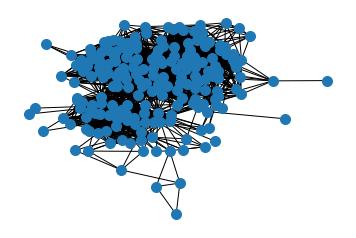

In [48]:
posJZG=nx.kamada_kawai_layout(JZG)
nx.draw_networkx_nodes(JZG, pos=posJZG, node_size=100)
#nx.draw_networkx_labels(JZG, pos=posJZG)
nx.draw_networkx_edges(JZG,pos=posJZG)
plt.box(False)
plt.show()

In [49]:
JZG.number_of_nodes()

198

In [50]:
JZG.number_of_edges()

2742

In [57]:
nx.shortest_path(JZG)

{0: {0: [0],
  1: [0, 1],
  2: [0, 2],
  3: [0, 3],
  4: [0, 4],
  5: [0, 5],
  6: [0, 6],
  7: [0, 7],
  8: [0, 8],
  9: [0, 9],
  10: [0, 10],
  11: [0, 11],
  12: [0, 12],
  13: [0, 13],
  14: [0, 14],
  15: [0, 15],
  16: [0, 16],
  17: [0, 17],
  18: [0, 18],
  19: [0, 19],
  20: [0, 20],
  21: [0, 21],
  22: [0, 22],
  23: [0, 23],
  119: [0, 1, 119],
  120: [0, 1, 120],
  121: [0, 1, 121],
  122: [0, 1, 122],
  66: [0, 1, 66],
  123: [0, 1, 123],
  124: [0, 1, 124],
  158: [0, 2, 158],
  146: [0, 2, 146],
  129: [0, 2, 129],
  147: [0, 2, 147],
  148: [0, 2, 148],
  149: [0, 2, 149],
  159: [0, 2, 159],
  144: [0, 2, 144],
  145: [0, 2, 145],
  156: [0, 2, 156],
  166: [0, 3, 166],
  167: [0, 3, 167],
  168: [0, 3, 168],
  151: [0, 3, 151],
  169: [0, 3, 169],
  170: [0, 3, 170],
  171: [0, 3, 171],
  172: [0, 3, 172],
  176: [0, 3, 176],
  163: [0, 3, 163],
  173: [0, 3, 173],
  100: [0, 3, 100],
  164: [0, 3, 164],
  132: [0, 3, 132],
  177: [0, 3, 177],
  111: [0, 3, 111],
  

In [58]:
nx.average_shortest_path_length(JZG)

2.2350407629595446

In [59]:
nx.diameter(JZG)

6

In [60]:
RT=nx.random_tree(198)
nx.average_shortest_path_length(RT)

17.145054606983543

In [61]:
nx.diameter(RT)

46

Distribution of shortest path lengths

In [62]:
spJZ=dict(nx.shortest_path_length(JZG))
spJZ

{0: {0: 0,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  119: 2,
  120: 2,
  121: 2,
  122: 2,
  66: 2,
  123: 2,
  124: 2,
  158: 2,
  146: 2,
  129: 2,
  147: 2,
  148: 2,
  149: 2,
  159: 2,
  144: 2,
  145: 2,
  156: 2,
  166: 2,
  167: 2,
  168: 2,
  151: 2,
  169: 2,
  170: 2,
  171: 2,
  172: 2,
  176: 2,
  163: 2,
  173: 2,
  100: 2,
  164: 2,
  132: 2,
  177: 2,
  111: 2,
  136: 2,
  178: 2,
  127: 2,
  165: 2,
  152: 2,
  154: 2,
  86: 2,
  88: 2,
  89: 2,
  91: 2,
  92: 2,
  153: 2,
  94: 2,
  95: 2,
  96: 2,
  97: 2,
  99: 2,
  101: 2,
  102: 2,
  103: 2,
  104: 2,
  105: 2,
  106: 2,
  27: 2,
  107: 2,
  108: 2,
  109: 2,
  110: 2,
  115: 2,
  116: 2,
  117: 2,
  73: 2,
  118: 2,
  74: 2,
  75: 2,
  25: 2,
  26: 2,
  47: 2,
  53: 2,
  54: 2,
  79: 2,
  80: 2,
  82: 2,
  83: 2,
  84: 2,
  85: 2,
  126: 2,
  137: 2,
  138: 

In [63]:
dJZ=[]
for v in JZG.nodes():
    for u in JZG.nodes():
        if v<u:
            dJZ.append(spJZ[v][u])
count=1.0*len(dJZ)
count

19503.0

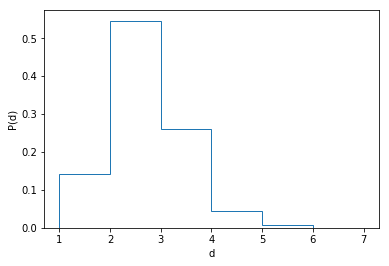

In [64]:
plt.hist(dJZ, bins=[1,2,3,4,5,6,7], density=True, histtype='step',align='mid')
plt.xlabel("d")
plt.ylabel("P(d)")
plt.show()

Little rock foodweb network. Directed, unweighted

In [65]:
nodesFW=pd.read_csv("../data/little_rock_foodweb/nodes.csv")

In [66]:
nodesFW.head()

,# index,name,group,_pos
0,0,Fine organic matter,Fine organic matter,"array([ 9.84800554, 10.53079274])"
1,1,Tabellaria,Chrysophyceae,"array([10.24942227, 10.33781662])"
2,2,Synura,Chrysophyceae,"array([10.47569978, 10.16271894])"
3,3,Synedra,Chrysophyceae,"array([10.42008264, 10.34436645])"
4,4,Mallomonas,Chrysophyceae,"array([10.20472116, 10.10517216])"


In [67]:
nodesFW.columns

Index(['# index', ' name', ' group', ' _pos'], dtype='object')

In [68]:
nodesFW.columns=nodesFW.columns.str.strip()

In [69]:
edgesFW=pd.read_csv("../data/little_rock_foodweb/edges.csv")

In [70]:
edgesFW.head()

,# source,target
0,0,1
1,0,2
2,0,3
3,0,4
4,0,5


Import network. Nodes and edges.

In [71]:
FWG= nx.from_pandas_edgelist(edgesFW,
                                     source = '# source', 
                                     target = ' target', 
                                     create_using =nx.DiGraph)

In [72]:
FWG.is_directed()

True

In [73]:
nx.average_shortest_path_length(FWG)

0.3590944574551132

In [74]:
nx.diameter(FWG)

NetworkXError: Found infinite path length because the digraph is not strongly connected

Our network is not strongly connected, thus the diameter is $\infty$

In [75]:
UFWG=FWG.to_undirected()

In [76]:
nx.diameter(UFWG)

4

In [77]:
spFW=dict(nx.shortest_path_length(FWG))
spFW

{0: {0: 0,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1,
  34: 1,
  35: 1,
  36: 1,
  37: 1,
  38: 1,
  39: 1,
  40: 1,
  41: 1,
  42: 1,
  43: 1,
  44: 1,
  45: 1,
  46: 1,
  47: 1,
  48: 1,
  49: 1,
  50: 1,
  51: 1,
  52: 1,
  53: 1,
  54: 1,
  55: 1,
  56: 1,
  57: 1,
  58: 1,
  59: 1,
  60: 1,
  61: 1,
  62: 1,
  63: 1,
  65: 2,
  67: 2,
  68: 2,
  69: 2,
  76: 2,
  147: 2,
  64: 2,
  73: 2,
  74: 2,
  156: 2,
  143: 2,
  148: 2,
  178: 2,
  77: 2,
  78: 2,
  79: 2,
  85: 2,
  88: 2,
  89: 2,
  90: 2,
  91: 2,
  92: 2,
  93: 2,
  94: 2,
  95: 2,
  96: 2,
  97: 2,
  98: 2,
  99: 2,
  100: 2,
  101: 2,
  102: 2,
  103: 2,
  82: 2,
  104: 2,
  105: 2,
  106: 2,
  107: 2,
  83: 2,
  108: 2,
  131: 2,
  132: 2,
  133: 2,
  134: 2,
  135: 2,
  136: 

In [78]:
dFW=[]
for v in FWG.nodes():
    for u in FWG.nodes():
        if v in spFW.keys():
            if u in spFW[v].keys():
                if v!=u:
                    dFW.append(spFW[v][u])
dFW=np.array(dFW)
print(np.min(dFW),np.max(dFW))

1 6


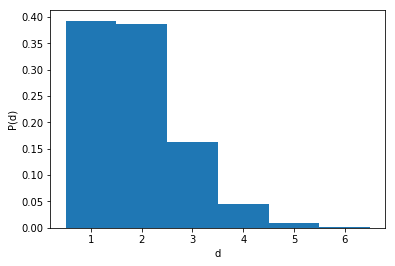

In [79]:
plt.hist(dFW, bins=[1,2,3,4,5,6,7], density=True, histtype='bar',align='left')
plt.xlabel("d")
plt.ylabel("P(d)")
plt.show()

1. Plot the distribution of the length of shortest paths of undirected Little Rock Foodweb graph. What is the difference?

Game of thrones network. Undirected, weighted. 

In [80]:
nodesGOT=pd.read_csv('../data/game_thrones/nodes.csv')
nodesGOT.head()

,# index,name,_pos
0,0,Aemon,"array([-6.26710367, -3.98543356])"
1,1,Grenn,"array([-6.16876976, -4.25622392])"
2,2,Samwell,"array([-6.20040749, -4.16643914])"
3,3,Aerys,"array([-6.22351778, -3.5141172 ])"
4,4,Jaime,"array([-6.08939813, -3.6398448 ])"


In [81]:
edgesGOT= pd.read_csv('../data/game_thrones/edges.csv')

edgesGOT.head()

,# source,target,weight
0,0,1,5
1,0,2,31
2,2,82,6
3,2,58,34
4,2,76,12


In [82]:
GOTG=nx.Graph()
for index,row in edgesGOT.iterrows():
    GOTG.add_edge(row['# source'],row[' target'], weight=(1.0)/(1.0*row[' weight']))
    
    #from_pandas_edgelist(edgesGOT, source = '# source', target = ' target', edge_attr=1.0/' weight')

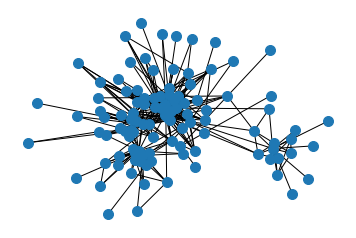

In [83]:
posGOT=nx.kamada_kawai_layout(GOTG)
nx.draw_networkx_nodes(GOTG, pos=posGOT, node_size=100)
#nx.draw_networkx_labels(JZG, pos=posJZG)
nx.draw_networkx_edges(GOTG,pos=posGOT)
plt.box(False)
plt.show()

In [84]:
GOTG.number_of_nodes()

107

In [85]:
nx.is_weighted(GOTG,  weight='weight')

True

In [86]:
nx.average_shortest_path_length(GOTG, weight='weight')

0.29486674456310913

In [87]:
nx.average_shortest_path_length(GOTG)

2.903897019925939

In [88]:
nx.diameter(GOTG)

6

2. What is the weighted diameter of GOT network?

In [89]:
nx.diameter(GOTG)

6

In [90]:
spwGOT=dict(nx.shortest_path_length(GOTG, weight='weight'))
spGOT=dict(nx.shortest_path_length(GOTG))

In [91]:
dwGOT=[]
dGOT=[]
for v in GOTG.nodes():
    for u in GOTG.nodes():
        if v<u:
            dGOT.append(spGOT[v][u])
            dwGOT.append(spwGOT[v][u])
dGOT=np.array(dGOT)
dwGOT=np.array(dwGOT)

print(np.min(dGOT), np.max(dGOT))
print(np.min(dwGOT), np.max(dwGOT))

1 6
0.010416666666666666 0.7816829004329005


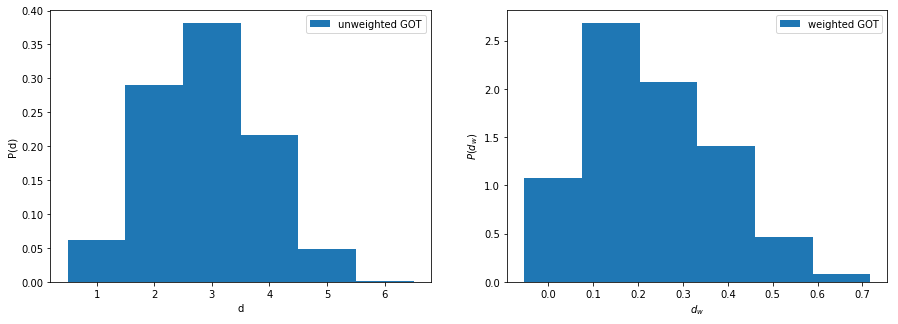

In [92]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.xlabel("d")
plt.ylabel('P(d)')
plt.hist(dGOT, bins=[1,2,3,4,5,6,7], density=True, histtype='bar',align='left',label="unweighted GOT")
plt.legend()

plt.subplot(1,2,2)
plt.xlabel(r"$d_{w}$")
plt.ylabel(r'$P(d_{w})$')
plt.hist(dwGOT, bins=6, density=True, histtype='bar',align='left', label="weighted GOT")
plt.legend()
plt.show()

## Centrality measures

### Degree centrality

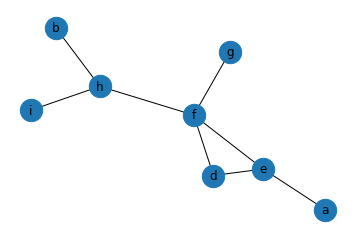

In [93]:
posG=nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos=posG, node_size=500)
nx.draw_networkx_labels(G, pos=posG)
nx.draw_networkx_edges(G,pos=posG,edge_color="black", width=1)
plt.box(False)
plt.show()

Degree centrality of a node $i$ is a normalized degree of a node $i$. <br>
$qc_{i}=\frac{q_{i}}{N-1}$

In [94]:
qc=nx.degree_centrality(G)
qc

{'a': 0.14285714285714285,
 'b': 0.14285714285714285,
 'd': 0.2857142857142857,
 'e': 0.42857142857142855,
 'f': 0.5714285714285714,
 'g': 0.14285714285714285,
 'h': 0.42857142857142855,
 'i': 0.14285714285714285}

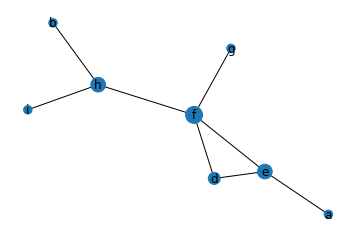

In [95]:
nx.draw_networkx_nodes(G, pos=posG, node_size=[v * 500 for v in qc.values()])
nx.draw_networkx_labels(G, pos=posG)
nx.draw_networkx_edges(G,pos=posG,edge_color="black", width=1)
plt.box(False)
plt.show()

### Betweenness centrality of a node

Betweenness centrality of a node and edge <br>
**nx.betweenness_centrality()** <br>
**nx.edge_betweenness_centrality()**

In [96]:
NBT=dict(nx.betweenness_centrality(G))
NBT

{'a': 0.0,
 'b': 0.0,
 'd': 0.0,
 'e': 0.2857142857142857,
 'f': 0.7142857142857142,
 'g': 0.0,
 'h': 0.5238095238095237,
 'i': 0.0}

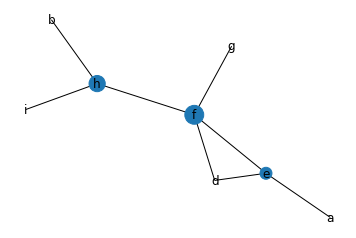

In [97]:
nx.draw_networkx_nodes(G, pos=posG, node_size=[v * 500 for v in NBT.values()])
nx.draw_networkx_labels(G, pos=posG)
nx.draw_networkx_edges(G,pos=posG,edge_color="black", width=1)
plt.box(False)
plt.show()

In [98]:
import matplotlib.colors as mcolors

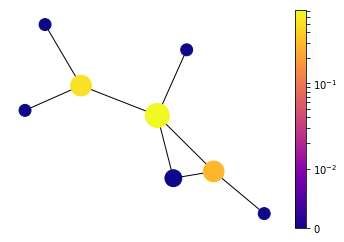

In [99]:
nodes = nx.draw_networkx_nodes(G, posG, nodelist=qc.keys(), cmap=plt.cm.plasma, node_color=list(NBT.values()), node_size=[v * 1000 for v in qc.values()])
nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
edges = nx.draw_networkx_edges(G, posG)
plt.colorbar(nodes)
plt.axis('off')
plt.show()

In [100]:
EBT=dict(nx.edge_betweenness_centrality(G))

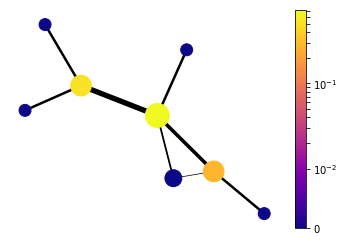

In [101]:
nodes = nx.draw_networkx_nodes(G, posG, nodelist=qc.keys(), cmap=plt.cm.plasma, node_color=list(NBT.values()), node_size=[v * 1000 for v in qc.values()])
nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
edges = nx.draw_networkx_edges(G, posG, edgelist=EBT.keys(), width=[v * 10 for v in EBT.values()])
plt.colorbar(nodes)
plt.axis('off')
plt.show()

### Closeness centrality

Closeness centrality of a node <br>
**nx.closeness_centrality()**

In [102]:
g=nx.closeness_centrality(G)

Degree centrality vs. closeness centrality

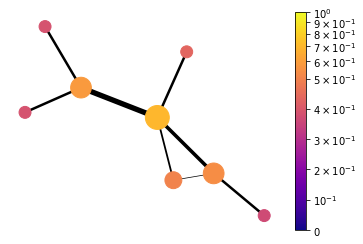

In [103]:
nodes = nx.draw_networkx_nodes(G, posG, nodelist=qc.keys(), cmap=plt.cm.plasma, node_color=list(g.values()), node_size=[v * 1000 for v in qc.values()])
nodes.set_norm(mcolors.SymLogNorm(linthresh=0.5, linscale=1, vmin=0, vmax=1))
edges = nx.draw_networkx_edges(G, posG, edgelist=EBT.keys(), width=[v * 10 for v in EBT.values()])
plt.colorbar(nodes)
plt.axis('off')
plt.show()

Betweenness centrality vs. closeness centrality

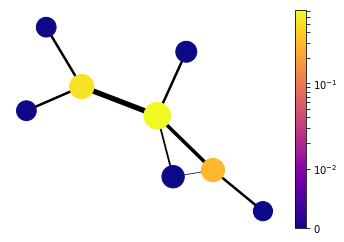

In [104]:
nodes = nx.draw_networkx_nodes(G, posG, nodelist=g.keys(), cmap=plt.cm.plasma, node_color=list(NBT.values()), node_size=[v * 1000 for v in g.values()])
nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
edges = nx.draw_networkx_edges(G, posG, edgelist=EBT.keys(), width=[v * 10 for v in EBT.values()])
plt.colorbar(nodes)
plt.axis('off')
plt.show()

#### Centrality distributions of Jazz collaboration network

In [105]:
qcJZ=nx.degree_centrality(JZG)
NBTJZ=nx.betweenness_centrality(JZG)
EBTJZ=nx.edge_betweenness_centrality(JZG)
gJZ=nx.closeness_centrality(JZG)

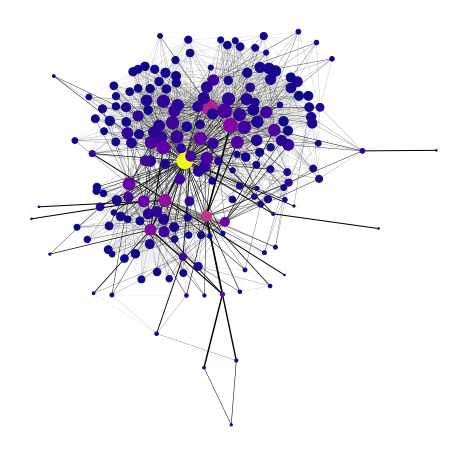

In [106]:
plt.figure(figsize=(8,8))
posJZG=nx.kamada_kawai_layout(JZG)
nx.draw_networkx_nodes(JZG, pos=posJZG, nodelist=qcJZ.keys(), cmap=plt.cm.plasma, node_color=list(NBTJZ.values()), node_size=[v * 500 for v in qcJZ.values()])
nodes.set_norm(mcolors.SymLogNorm(linthresh=0.01, linscale=1))
nx.draw_networkx_edges(JZG,pos=posJZG, edgelist=EBTJZ.keys(), width=[v * 100 for v in EBTJZ.values()])
plt.box(False)
plt.show()

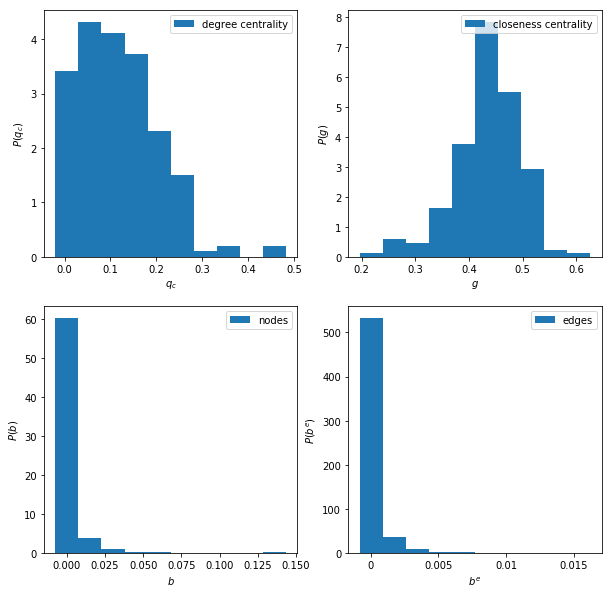

In [107]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.xlabel("$q_{c}$")
plt.ylabel('$P(q_{c})$')
plt.hist([v for v in qcJZ.values()], bins=10, density=True, histtype='bar',align='left',label="degree centrality")
plt.legend()

plt.subplot(2,2,2)
plt.xlabel(r"$g$")
plt.ylabel(r'$P(g)$')
plt.hist([v for v in gJZ.values()], bins=10, density=True, histtype='bar',align='left',label="closeness centrality")
plt.legend()

plt.subplot(2,2,3)
plt.xlabel(r"$b$")
plt.ylabel(r'$P(b)$')
plt.hist([v for v in NBTJZ.values()], bins=10, density=True, histtype='bar',align='left',label="nodes")
plt.legend()

plt.subplot(2,2,4)
plt.xlabel(r"$b^{e}$")
plt.ylabel(r'$P(b^{e})$')
plt.xticks([0,0.005,0.01,0.015], ['0','0.005','0.01','0.015'])
plt.hist([v for v in EBTJZ.values()], bins=10, density=True, histtype='bar',align='left',label="edges")
plt.legend()
plt.show()


In [108]:
a=[v for v in qcJZ.values()]
b=[v for v in NBTJZ.values()]
c=[v for v in gJZ.values()]

In [109]:
Cab=np.corrcoef(a,b)
Cac=np.corrcoef(a,c)
Cbc=np.corrcoef(b,c)
Cbc[0][1]

0.47453331814710226

In [110]:
C=np.array([[1,0,0],[np.around(Cab[0][1],2),1,0],[np.around(Cac[0][1],2),np.around(Cbc[0][1],2),1]])


### Annotated heatmaps

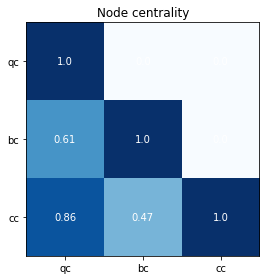

In [111]:
cc=['qc','bc','cc']
fig, ax = plt.subplots()
im = ax.imshow(C, cmap="Blues")
ax.set_xticks(np.arange(len(cc)))
ax.set_yticks(np.arange(len(cc)))
ax.set_xticklabels(cc)
ax.set_yticklabels(cc)
for i in range(len(cc)):
    for j in range(len(cc)):
        text = ax.text(j, i, C[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Node centrality")
fig.tight_layout()
plt.show()
fig.savefig("centrality_correlations.png")
plt.show()


## Homework

If we ignore the weights in the Game of thrones network (../data/game_thrones/), we have undirected and unweighted network. Calculate pearson correlation coefficient between node degree centrality, node betweenness centrality, and closeness centrality. Plot it as annotated heatmaps. Save the figure as a png extension and upload it. <br>

Submission link: https://forms.gle/Dnr5EY1E6AKSw6tU7

In [112]:
qcGOT=nx.degree_centrality(GOTG)
NBTGOT=nx.betweenness_centrality(GOTG)
EBTGOT=nx.edge_betweenness_centrality(GOTG)
gGOT=nx.closeness_centrality(GOTG)

In [113]:
a=[v for v in qcGOT.values()]
b=[v for v in NBTGOT.values()]
c=[v for v in gGOT.values()]

In [115]:
Cab=np.corrcoef(a,b)
Cac=np.corrcoef(a,c)
Cbc=np.corrcoef(b,c)

In [116]:
C=np.array([[1,0,0],[np.around(Cab[0][1],2),1,0],[np.around(Cac[0][1],2),np.around(Cbc[0][1],2),1]])

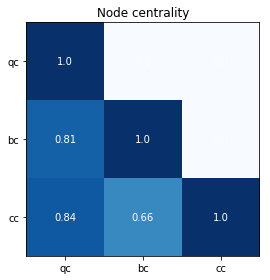

In [117]:
cc=['qc','bc','cc']
fig, ax = plt.subplots()
im = ax.imshow(C, cmap="Blues")
ax.set_xticks(np.arange(len(cc)))
ax.set_yticks(np.arange(len(cc)))
ax.set_xticklabels(cc)
ax.set_yticklabels(cc)
for i in range(len(cc)):
    for j in range(len(cc)):
        text = ax.text(j, i, C[i, j],
                       ha="center", va="center", color="w")

ax.set_title("Node centrality")
fig.tight_layout()
plt.show()
fig.savefig("GOT.png")
plt.show()